In [1]:
import pandas as pd

In [132]:
stock_fund_general = pd.read_excel('./excel/주식고편입형_일반_수익률.xls')
stock_fund_general.head()

,Unnamed: 0,펀드명,1개월 수익률,3개월 수익률,6개월 수익률,9개월 수익률,1년 수익률,2년 수익률,3년 수익률,5년 수익률
0,0,골든브릿지레인보우중소성장기업증권투자신탁(사모투자재간접형),-8.26,-9.54,-15.29,-10.04,-7.08,19.63,0.00,0.00
1,1,교보악사Hi-Korea적립식멀티증권투자신탁K- 1(주식)(운용),-12.01,-13.47,-17.70,-16.71,-20.27,19.30,19.81,9.75
2,2,교보악사Hi-Korea적립식멀티증권투자신탁K- 1Af(주식),-12.03,-13.54,-17.83,-16.91,-20.52,18.59,18.74,8.10
3,3,교보악사Hi-Korea적립식멀티증권투자신탁K- 1e(주식),-12.07,-13.66,-18.04,-17.23,-20.93,17.43,17.01,5.49
4,4,교보악사그린디지털목표전환증권투자신탁[주식](운용),-21.49,-25.73,0.00,0.00,0.00,0.00,0.00,0.00


In [133]:
stock_fund_general.drop("Unnamed: 0", axis=1, inplace=True)

#### 샤프지수 : (펀드수익률 - 무위험수익률(=CD90일 금리))/위험(=펀드수익률의 표준편차)

In [134]:
# 7월 CD90일 금리
cd_rate_07 = 2.34/100
cd_rate_07

0.023399999999999997

In [135]:
stock_fund_general["1개월 수익률"] = stock_fund_general["1개월 수익률"]/100
stock_fund_general["1개월 수익률"]

0      -0.0826
1      -0.1201
2      -0.1203
3      -0.1207
4      -0.2149
         ...  
1666   -0.1237
1667   -0.1245
1668   -0.1247
1669   -0.1235
1670   -0.1240
Name: 1개월 수익률, Length: 1671, dtype: float64

In [136]:
stock_fund_general["1개월 수익률"]-cd_rate_07

0      -0.1060
1      -0.1435
2      -0.1437
3      -0.1441
4      -0.2383
         ...  
1666   -0.1471
1667   -0.1479
1668   -0.1481
1669   -0.1469
1670   -0.1474
Name: 1개월 수익률, Length: 1671, dtype: float64

In [137]:
import numpy as np
np.std(stock_fund_general["1개월 수익률"])

0.02888738851960271

In [138]:
stock_fund_general["1개월 샤프지수"] = ((stock_fund_general["1개월 수익률"])-cd_rate_07)/np.std(stock_fund_general["1개월 수익률"])
stock_fund_general["1개월 샤프지수"]

0      -3.669421
1      -4.967566
2      -4.974489
3      -4.988336
4      -8.249275
          ...   
1666   -5.092188
1667   -5.119881
1668   -5.126805
1669   -5.085264
1670   -5.102573
Name: 1개월 샤프지수, Length: 1671, dtype: float64

In [153]:
stock_fund_general["5년 샤프지수"] = (stock_fund_general["5년 수익률"]-cd_rate_07**np.sqrt(60))/np.std(stock_fund_general["5년 수익률"])
stock_fund_general["5년 샤프지수"]

0      -1.491805e-14
1       6.233278e-01
2       5.178415e-01
3       3.509815e-01
4      -1.491805e-14
            ...     
1666    9.634410e-01
1667    5.613146e-01
1668    4.922691e-01
1669    5.868871e-01
1670    8.355789e-01
Name: 5년 샤프지수, Length: 1671, dtype: float64

In [140]:
stock_fund_general.columns

Index(['펀드명', '1개월 수익률', '3개월 수익률', '6개월 수익률', '9개월 수익률', '1년 수익률', '2년 수익률',
       '3년 수익률', '5년 수익률', '1개월 샤프지수', '3개월 샤프지수'],
      dtype='object')

In [141]:
# 기간 컬럼명
return_columns = stock_fund_general.columns[1:9]
return_columns

Index(['1개월 수익률', '3개월 수익률', '6개월 수익률', '9개월 수익률', '1년 수익률', '2년 수익률',
       '3년 수익률', '5년 수익률'],
      dtype='object')

In [142]:
# import numpy as np

# for column in return_columns:
#     stock_fund_general[column[:3] + " 샤프지수"] = (stock_fund_general[column]-cd_rate_07)/np.std(stock_fund_general[column])

In [156]:
stock_fund_general.head(10)

,펀드명,1개월 수익률,3개월 수익률,6개월 수익률,9개월 수익률,1년 수익률,2년 수익률,3년 수익률,5년 수익률,1개월 샤프지수,3개월 샤프지수,6개월 샤프지수,9개월 샤프지수,1년 샤프지수,2년 샤프지수,3년 샤프지수,5년 샤프지수
0,골든브릿지레인보우중소성장기업증권투자신탁(사모투자재간접형),-0.0826,-9.54,-15.29,-10.04,-7.08,19.63,0.00,0.00,-3.669421,-2.234137,-2.321014,-1.526223,-8.855028e-01,1.400752e+00,-1.039189e-11,-1.491805e-14
1,교보악사Hi-Korea적립식멀티증권투자신탁K- 1(주식)(운용),-0.1201,-13.47,-17.70,-16.71,-20.27,19.30,19.81,9.75,-4.967566,-3.154345,-2.686848,-2.540156,-2.535189e+00,1.377204e+00,1.253960e+00,6.233278e-01
2,교보악사Hi-Korea적립식멀티증권투자신탁K- 1Af(주식),-0.1203,-13.54,-17.83,-16.91,-20.52,18.59,18.74,8.10,-4.974489,-3.170735,-2.706582,-2.570559,-2.566457e+00,1.326540e+00,1.186230e+00,5.178415e-01
3,교보악사Hi-Korea적립식멀티증권투자신탁K- 1e(주식),-0.1207,-13.66,-18.04,-17.23,-20.93,17.43,17.01,5.49,-4.988336,-3.198833,-2.738460,-2.619203,-2.617736e+00,1.243765e+00,1.076722e+00,3.509815e-01
4,교보악사그린디지털목표전환증권투자신탁[주식](운용),-0.2149,-25.73,0.00,0.00,0.00,0.00,0.00,0.00,-8.249275,-6.025018,-0.000015,-0.000002,-2.805140e-07,-7.315818e-10,-1.039189e-11,-1.491805e-14
5,교보악사그린디지털증권모투자신탁[주식],-0.2189,-26.31,-34.22,-25.37,-24.87,23.87,15.36,17.69,-8.387743,-6.160825,-5.194559,-3.856597,-3.110516e+00,1.703309e+00,9.722779e-01,1.130940e+00
6,교보악사그린디지털증권자투자신탁2[주식],-0.2081,-25.08,-32.51,-23.94,-23.49,21.85,13.64,15.75,-8.013878,-5.872821,-4.934983,-3.639217,-2.937918e+00,1.559166e+00,8.634030e-01,1.006914e+00
7,교보악사그린디지털증권자투자신탁[주식](운용),-0.2076,-25.02,-32.71,-23.29,-23.41,22.99,15.33,17.03,-7.996569,-5.858772,-4.965343,-3.540408,-2.927912e+00,1.640514e+00,9.703789e-01,1.088746e+00
8,교보악사그린디지털증권자투자신탁[주식]C3,-0.2085,-25.27,-33.13,-24.74,0.00,-33.64,-24.40,-39.37,-8.027725,-5.917309,-5.029098,-3.760828,-2.805140e-07,-2.400474e+00,-1.544504e+00,-2.516966e+00
9,교보악사위대한중소형밸류증권모투자신탁 1(주식),-0.1331,-19.51,-24.73,-26.02,-25.57,24.71,18.90,27.20,-5.417589,-4.568608,-3.753991,-3.955406,-3.198065e+00,1.763249e+00,1.196358e+00,1.738925e+00


In [158]:
max_sharpe = stock_fund_general.loc[stock_fund_general["1년 샤프지수"] == stock_fund_general["1년 샤프지수"].max()]
max_sharpe 

,펀드명,1개월 수익률,3개월 수익률,6개월 수익률,9개월 수익률,1년 수익률,2년 수익률,3년 수익률,5년 수익률,1개월 샤프지수,3개월 샤프지수,6개월 샤프지수,9개월 샤프지수,1년 샤프지수,2년 샤프지수,3년 샤프지수,5년 샤프지수
66,마이다스거북이90증권자투자신탁 1(주식)(운용),0.0098,2.77,1.72,8.85,14.54,36.0,39.97,33.87,-0.470794,0.648244,0.261078,1.345322,1.818532,2.568878,2.530075,2.165345


In [170]:
a = -0.0585 # 3개월 수익률
b = 0.02345**np.sqrt(3) # CD90일 금리
c = (a-b)/np.std(b)
print(c)

-inf


d:\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


0.816496580927726

In [306]:
import pandas as pd

df = pd.read_csv('./csv/tui-chart.csv')
df

,Unnamed: 0,2019-07-26,2019-07-27,2019-07-28,2019-07-29,2019-07-30,2019-07-31,2019-08-01,2019-08-02,2019-08-03,...,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26
0,투자수익률,0,0,0.01,0.08,0.03,0.14,0.06,0.36,0.37,...,-4.59,-4.85,-4.72,-5.22,-5.26,-4.93,-4.92,-4.91,-4.48,-4.37
1,비교지수,0,0,0.01,0.08,0.04,0.16,0.08,0.39,0.39,...,-4.34,-4.63,-4.54,-4.98,-5.00,-4.72,-4.71,-4.70,-4.30,-4.20


In [307]:
df2 = pd.read_csv('./csv/시장금리(일별)_27194352.csv')
df2

,통계표,계정항목,단위,변환,2021/07/01,2021/07/02,2021/07/05,2021/07/06,2021/07/07,2021/07/08,...,2022/06/20,2022/06/21,2022/06/22,2022/06/23,2022/06/24,2022/06/27,2022/06/28,2022/06/29,2022/06/30,2022/07/01
0,1.3.2.1. 시장금리(일별),CD(91일),연%,원자료,0.69,0.69,0.69,0.69,0.69,0.69,...,1.99,1.99,2.0,2.0,2.0,2.0,2.02,2.04,2.04,2.05


In [308]:
df = df.transpose()

In [309]:
df2 = df2.transpose()

In [310]:
df.rename(columns=df.iloc[0], inplace=True)
df = df.drop(df.index[0])

In [311]:
df2.rename(columns=df2.iloc[0], inplace=True)
df2 = df2.drop(df2.index[0])

In [312]:
df.reset_index(inplace=True)

In [313]:
df2.reset_index(inplace=True)

In [314]:
df.rename(columns={"index" : "날짜"}, inplace=True)

In [315]:
df = df.query("날짜>='2021-07-01' and 날짜 <='2022-07-01'")

In [316]:
df.reset_index(drop=True, inplace=True)

In [317]:
df

,날짜,투자수익률,비교지수
0,2021-07-01,0.11,-0.26
1,2021-07-02,0.1,-0.26
2,2021-07-03,0.1,-0.26
3,2021-07-04,0.11,-0.25
4,2021-07-05,0.23,-0.13
...,...,...,...
356,2022-06-27,-6.89,-6.61
357,2022-06-28,-6.79,-6.51
358,2022-06-29,-6.73,-6.49
359,2022-06-30,-6.58,-6.34


In [318]:
df["날짜"] = pd.to_datetime(df["날짜"])

In [319]:
df.drop(["비교지수"], axis=1, inplace=True)

In [320]:
df2.columns = ["날짜", "CD금리"]

In [321]:
df2 = df2.loc[3:]

In [322]:
df2.reset_index(drop=True, inplace=True)

In [323]:
df2

,날짜,CD금리
0,2021/07/01,0.69
1,2021/07/02,0.69
2,2021/07/05,0.69
3,2021/07/06,0.69
4,2021/07/07,0.69
...,...,...
243,2022/06/27,2
244,2022/06/28,2.02
245,2022/06/29,2.04
246,2022/06/30,2.04


In [324]:
df["날짜"] = df["날짜"].astype(str)

In [325]:
df2["날짜"] = df2["날짜"].astype(str)
df2["날짜"] = df2["날짜"].str.replace("/","-")

In [293]:
merge = pd.merge(df, df2, on="날짜", how="left")

In [294]:
merge

,날짜,투자수익률,CD금리
0,2021-07-01,0.11,0.69
1,2021-07-02,0.1,0.69
2,2021-07-03,0.1,0.69
3,2021-07-04,0.11,0.69
4,2021-07-05,0.23,0.69
...,...,...,...
356,2022-06-27,-6.89,NaN
357,2022-06-28,-6.79,NaN
358,2022-06-29,-6.73,NaN
359,2022-06-30,-6.58,NaN


In [330]:
df.set_index(["날짜"], inplace=True)
df2.set_index(["날짜"], inplace=True)


In [331]:
df3 = df.copy()

In [332]:
df3["CD금리"] = df2["CD금리"]

In [333]:
df3

,투자수익률,CD금리
날짜,,
2021-07-01,0.11,0.69
2021-07-02,0.1,0.69
2021-07-03,0.1,NaN
2021-07-04,0.11,NaN
2021-07-05,0.23,0.69
...,...,...
2022-06-27,-6.89,2
2022-06-28,-6.79,2.02
2022-06-29,-6.73,2.04


In [336]:
df3["투자수익률"] = df3["투자수익률"]/100
df3

,투자수익률,CD금리
날짜,,
2021-07-01,0.0011,0.69
2021-07-02,0.001,0.69
2021-07-03,0.001,NaN
2021-07-04,0.0011,NaN
2021-07-05,0.0023,0.69
...,...,...
2022-06-27,-0.0689,2
2022-06-28,-0.0679,2.02
2022-06-29,-0.0673,2.04


In [342]:
df3["CD금리"] = df3["CD금리"]/100

In [343]:
df3["CD금리"] = df3["CD금리"].fillna(method="ffill")
df3

,투자수익률,CD금리
날짜,,
2021-07-01,0.0011,0.0069
2021-07-02,0.001,0.0069
2021-07-03,0.001,0.0069
2021-07-04,0.0011,0.0069
2021-07-05,0.0023,0.0069
...,...,...
2022-06-27,-0.0689,0.0200
2022-06-28,-0.0679,0.0202
2022-06-29,-0.0673,0.0204


In [357]:
# 날짜 인덱스에서 월만 추출
df3["month"] = df3.index.astype(str).str[:7]
df3

,투자수익률,CD금리,month
날짜,,,
2021-07-01,0.0011,0.0069,2021-07
2021-07-02,0.0010,0.0069,2021-07
2021-07-03,0.0010,0.0069,2021-07
2021-07-04,0.0011,0.0069,2021-07
2021-07-05,0.0023,0.0069,2021-07
...,...,...,...
2022-06-27,-0.0689,0.0200,2022-06
2022-06-28,-0.0679,0.0202,2022-06
2022-06-29,-0.0673,0.0204,2022-06


In [363]:
# 일별 수익률, CD금리의 합으로 월별 수익률, CD금리 계산
monthly_return = df3.groupby(["month"]).sum()
monthly_return

,투자수익률,CD금리
month,,
2021-07,0.2504,0.2151
2021-08,0.4045,0.2299
2021-09,0.2199,0.2847
2021-10,-0.2751,0.3118
2021-11,-0.2453,0.3510
2021-12,0.0525,0.3942
2022-01,-0.2850,0.4185
2022-02,-0.5225,0.4200
2022-03,-0.6425,0.4658


In [364]:
import numpy as np
# 월별 샤프지수?
(monthly_return["투자수익률"]-monthly_return["CD금리"])/np.std(monthly_return["투자수익률"])

month
2021-07    0.051637
2021-08    0.255404
2021-09   -0.094789
2021-10   -0.858516
2021-11   -0.872266
2021-12   -0.499838
2022-01   -1.029078
2022-02   -1.378687
2022-03   -1.621218
2022-04   -2.687451
2022-05   -2.935981
2022-06   -3.614572
2022-07   -0.117024
dtype: float64

In [347]:
df3["투자수익률"] = df3["투자수익률"].astype(float)

In [365]:
(np.log1p(monthly_return["투자수익률"])-monthly_return["CD금리"])/np.std(np.log1p(monthly_return["투자수익률"]))

d:\anaconda3\envs\py36_32\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


month
2021-07    0.020115
2021-08    0.264029
2021-09   -0.206668
2021-10   -1.523646
2021-11   -1.521033
2021-12   -0.825006
2022-01   -1.813337
2022-02   -2.787904
2022-03   -3.594144
2022-04         NaN
2022-05         NaN
2022-06         NaN
2022-07   -0.196837
dtype: float64

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

d:\anaconda3\envs\py36_32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='투자수익률', ylabel='Density'>

d:\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53804 missing 

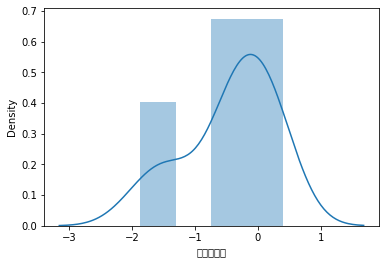

In [366]:
sns.distplot(monthly_return['투자수익률'])

d:\anaconda3\envs\py36_32\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda3\envs\py36_32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='투자수익률', ylabel='Density'>

d:\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53804 missing 

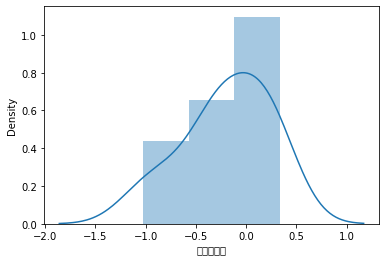

In [367]:
sns.distplot(np.log1p(monthly_return["투자수익률"]))